In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

# DATA

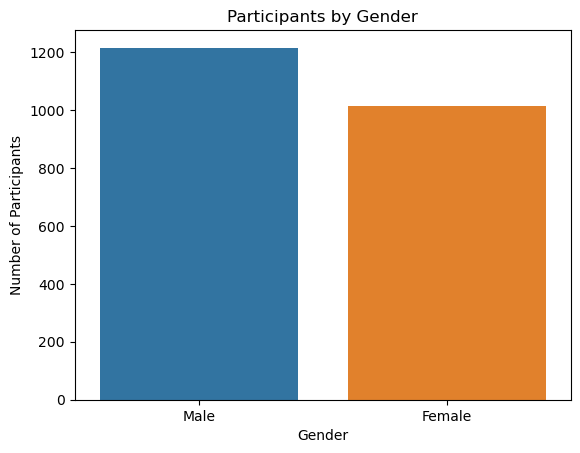

In [2]:
data = {"Gender": ["Male", "Female"], "Participants": [1215, 1015]}

sns.barplot(x="Gender", y="Participants", data=data)

plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.title("Participants by Gender")

plt.show()

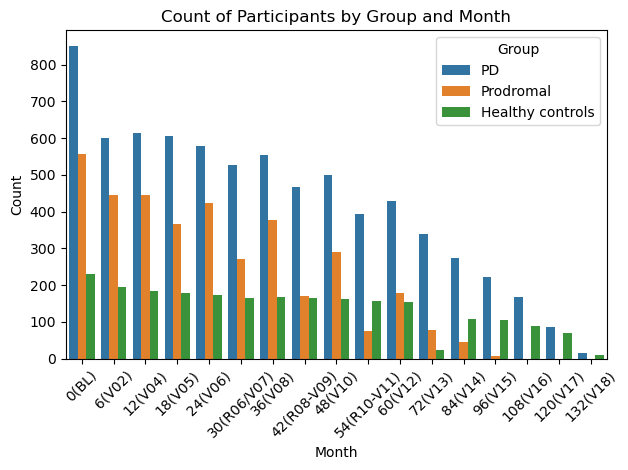

In [3]:
visits_all = pd.read_csv("visits.csv")

visits_all.rename(columns={"Month (Visit code)":"Month"}, inplace=True)

df_melt = pd.melt(visits_all, id_vars=['Month'], var_name='Group', value_name='Count')

sns.barplot(x='Month', y='Count', hue='Group', data=df_melt)

plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count of Participants by Group and Month')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Subjects by race in different groups')

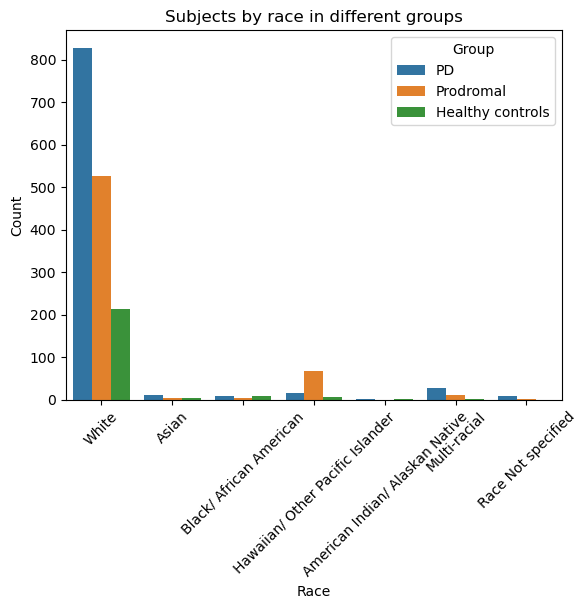

In [4]:
race_all = pd.read_csv("race.csv")
df_melt = pd.melt(race_all, id_vars=['Category'], var_name='Group', value_name='Count')
sns.barplot(data=df_melt, x='Category', y='Count', hue='Group')

plt.xlabel("Race")
plt.xticks(rotation=45)
plt.title("Subjects by race in different groups")

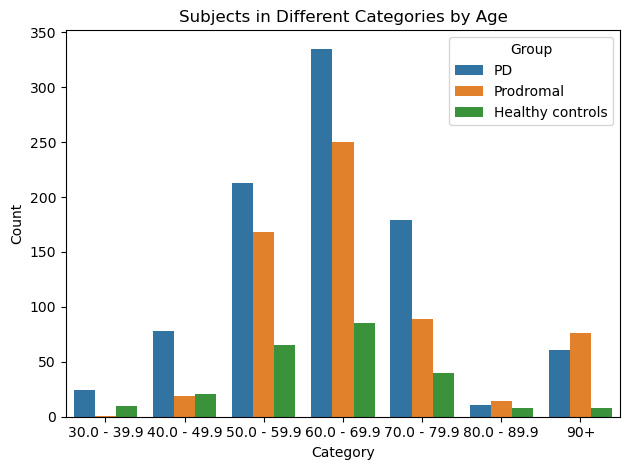

In [5]:
age_all = pd.read_csv("age.csv")
df_melt = pd.melt(age_all, id_vars=['Category'], var_name='Group', value_name='Count')
sns.barplot(data=df_melt, x='Category', y='Count', hue='Group')

plt.title("Subjects in Different Categories by Age")
plt.tight_layout()

### Analysis and Model Development

In [6]:
df = pd.read_csv("PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv")

# df.info()

The APPRDX Columns renamdes as group and they represent the following:
<br>1	PD Participant
<br>2	Healthy Control
<br>3	SWEDD

In [7]:
df.rename(columns={"APPRDX":"Group"}, inplace=True) 
# df.describe()
df.head(10)

,SITE,PATNO,Group,EVENT_ID,YEAR,visit_date,ST_startdate,ST_year1,ST_year2,ST_year3,ST_year4,ST_year5,changedx,primdiag,othneuro,age,age_cat,gen,EDUCYRS,educ,HISPLAT,race,fampd_new,fampd_old,duration,ageonset,agediag,DOMSIDE,symptom1,symptom2,symptom3,symptom4,symptom5,symptom5_comment,symptom6,hy,hy_on,NHY,NHY_ON,rigidity,rigidity_on,td_pigd,td_pigd_on,td_pigd_old,td_pigd_old_on,tremor,tremor_on,updrs3_score,updrs3_score_on,PD_MED_USE,MSEADLG,updrs1_score,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1FATG,updrs2_score,updrs_totscore,updrs_totscore_on,updrs4_score,upsit,bjlot,ess,ess_cat,gds,gds_cat,hvlt_immediaterecall,HVLTRDLY,HVLTREC,HVLTFPRL,hvlt_discrimination,hvlt_retention,lns,quip_gamble,quip_sex,quip_buy,quip_eat,quip_hobby,quip_pund,quip_walk,quip,quip_any,rem,rem_cat,rem_q6,scopa_gi,scopa_ur,scopa_cv,scopa_therm,scopa_pm,scopa_sex,scopa,VLTANIM,VLTVEG,VLTFRUIT,sft,stai_state,stai_trait,stai,SDMTOTAL,upsit_cat,moca,CAUDATE_R,CAUDATE_L,PUTAMEN_R,PUTAMEN_L,r_striatum,l_striatum,mean_caudate,mean_putamen,mean_striatum,low_caudate,hi_caudate,low_putamen,hi_putamen,low_striatum,hi_striatum,ai_caudate,ai_putamen,ai_striatum,l_cdr,r_cdr,con_striatum,con_caudate,con_putamen,con_cdr,ips_striatum,ips_caudate,ips_putamen,ips_cdr,abeta,asyn,tau,ptau,abeta_txt,tau_txt,ptau_txt,tau_ab,ptau_ab,ptau_tau,ab_asyn,tau_asyn,ptau_asyn,hemo,hemo_below,hemo_above,hemohi,urate,APOE,SNCA_rs356181,SNCA_rs3910105,APOE_e4,MAPT,LEDD,MCI_testscores,cogstate
0,10,3000,2,BL,0,FEB2011,NaN,0,0,0,0,0,NaN,17.0,NaN,69.139726,3,2,18,2,2,1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,0.0,4.0,4.0,0.0,NaN,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,35.0,15.0,5.0,0.0,1.0,0.0,30.0,10.0,12.0,0.0,12.0,0.909091,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,5.0,28.0,15.0,22.0,65.0,23.0,32.0,55.0,53.0,1.0,27.0,2.99,3.43,2.94,2.63,5.93,6.06,3.21,2.785,2.9975,2.99,3.43,2.63,2.94,5.93,6.06,13.707165,11.131059,2.168474,1.304183,1.017007,5.995,3.21,2.785,1.160595,5.995,3.21,2.785,1.160595,1356.0,1798.9,213.4,17.50,NaN,NaN,NaN,0.157375,0.012906,0.082006,0.753794,0.118628,0.009728,437.4,NaN,NaN,1.0,315.0,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
1,10,3000,2,V04,1,MAR2012,NaN,0,0,0,0,0,0.0,17.0,NaN,69.139726,3,2,18,2,2,1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,NaN,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,6.0,NaN,NaN,15.0,7.0,0.0,0.0,0.0,26.0,10.0,11.0,1.0,10.0,1.000000,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,7.0,22.0,19.0,18.0,59.0,29.0,29.0,58.0,55.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,1547.0,203.1,17.30,NaN,NaN,NaN,0.191604,0.016321,0.085180,0.685197,0.131286,0.011183,103.2,NaN,NaN,0.0,NaN,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
2,10,3000,2,V06,2,FEB2013,NaN,0,0,0,0,0,0.0,17.0,NaN,69.139726,3,2,18,2,2,1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,0.0,4.0,4.0,0.0,NaN,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,NaN,14.0,5.0,0.0,1.0,0.0,28.0,10.0,12.0,1.0,11.0,0.909091,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,7.0,23.0,25.0,15.0,63.0,36.0,33.0,69.0,51.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e3/e3,T/T,C/C,0.0,H1/H2,NaN,0.0,NaN
3,10,3000,2,V08,3,MAR2014,NaN,0,0,0,0,0,0.0,17.0,NaN,69.139726,3,2,18,2,2,1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,0.0,0.0,2.0,2.0,0.0,NaN,9.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,11.0,NaN,NaN,13.0,2.0,0.0,1.0,0.0,28.0,11.0,12.0,2.0,10.0,1.000000,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,7.0,30.0,17.0,22.0,69.0,27.0,29.0,56.0,53.0,NaN,30.0,NaN,NaN,NaN,NaN

In [8]:
#df.columns.tolist()

Cleaned the columns with has more than 450 null values, inspected data previously since i will not include the imaging data in the first model and null values comes from the imaging data dropped those columns. Other columns will be dropped is the following list, they are selected based on the dict description. To see what are they about refer to the dictionary and raw data:
SITE, EDUCYRS, educ, fampd_old, hy, hy_on (kept nhy, these two are derived data), td_pigd_old, td_pigd_old_on

In [9]:
null_cols = pd.DataFrame(df.isnull().sum().sort_values())
null_cols_over_450 = null_cols[null_cols[0]>450][0]
cols_list_to_drop = null_cols_over_450.index.tolist()
null_filtered = df
null_filtered.drop(cols_list_to_drop, axis=1, inplace=True)
to_drop = ['SITE', 'EDUCYRS', 'educ', 'fampd_old', 'hy', 'hy_on' , 'td_pigd_old', 'td_pigd_old_on']
null_filtered.drop(to_drop, axis=1, inplace=True)
null_filtered['visit_date'] = pd.to_datetime(null_filtered['visit_date'], format='%b%Y')
# null_filtered.info()

In [10]:
null_filtered.head()

,PATNO,Group,EVENT_ID,YEAR,visit_date,ST_year1,ST_year2,ST_year3,ST_year4,ST_year5,primdiag,age,age_cat,gen,HISPLAT,race,fampd_new,symptom6,NHY,NHY_ON,rigidity,rigidity_on,td_pigd,td_pigd_on,tremor,tremor_on,updrs3_score,updrs3_score_on,PD_MED_USE,updrs1_score,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1FATG,updrs2_score,updrs_totscore,updrs_totscore_on,bjlot,ess,ess_cat,gds,gds_cat,hvlt_immediaterecall,HVLTRDLY,HVLTREC,HVLTFPRL,hvlt_discrimination,hvlt_retention,lns,quip_gamble,quip_sex,quip_buy,quip_eat,quip_hobby,quip_pund,quip_walk,quip,quip_any,rem,rem_cat,rem_q6,scopa_gi,scopa_ur,scopa_cv,scopa_therm,scopa_pm,scopa_sex,scopa,VLTANIM,VLTVEG,VLTFRUIT,sft,stai_state,stai_trait,stai,SDMTOTAL,moca,urate,APOE,SNCA_rs356181,SNCA_rs3910105,APOE_e4,MAPT,MCI_testscores
0,3000,2,BL,0,2011-02-01,0,0,0,0,0,17.0,69.139726,3,2,2,1,3.0,1,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,4.0,0.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,15.0,5.0,0.0,1.0,0.0,30.0,10.0,12.0,0.0,12.0,0.909091,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,5.0,28.0,15.0,22.0,65.0,23.0,32.0,55.0,53.0,27.0,315.0,e3/e3,T/T,C/C,0.0,H1/H2,0.0
1,3000,2,V04,1,2012-03-01,0,0,0,0,0,17.0,69.139726,3,2,2,1,3.0,1,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,6.0,15.0,7.0,0.0,0.0,0.0,26.0,10.0,11.0,1.0,10.0,1.000000,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,7.0,22.0,19.0,18.0,59.0,29.0,29.0,58.0,55.0,29.0,NaN,e3/e3,T/T,C/C,0.0,H1/H2,0.0
2,3000,2,V06,2,2013-02-01,0,0,0,0,0,17.0,69.139726,3,2,2,1,3.0,1,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,4.0,0.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,10.0,14.0,5.0,0.0,1.0,0.0,28.0,10.0,12.0,1.0,11.0,0.909091,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,7.0,23.0,25.0,15.0,63.0,36.0,33.0,69.0,51.0,28.0,NaN,e3/e3,T/T,C/C,0.0,H1/H2,0.0
3,3000,2,V08,3,2014-03-01,0,0,0,0,0,17.0,69.139726,3,2,2,1,3.0,1,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,9.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,11.0,13.0,2.0,0.0,1.0,0.0,28.0,11.0,12.0,2.0,10.0,1.000000,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,7.0,30.0,17.0,22.0,69.0,27.0,29.0,56.0,53.0,30.0,274.0,e3/e3,T/T,C/C,0.0,H1/H2,0.0
4,3000,2,V10,4,2015-03-01,0,0,0,0,0,17.0,69.139726,3,2,2,1,3.0,1,0.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,19.0,19.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,25.0,14.0,5.0,0.0,0.0,0.0,30.0,10.0,12.0,0.0,12.0,0.833333,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,10.0,26.0,21.0,12.0,59.0,33.0,33.0,66.0,51.0,29.0,244.0,e3/e3,T/T,C/C,0.0,H1/H2,0.0


In [11]:
null_filtered['ST_FLAG'] = null_filtered['EVENT_ID'].apply(lambda x: 1 if x == 'ST' else 0)
null_filtered = null_filtered.drop(null_filtered[null_filtered['EVENT_ID'] == 'ST'].index)
null_filtered[null_filtered['ST_FLAG']==1]

,PATNO,Group,EVENT_ID,YEAR,visit_date,ST_year1,ST_year2,ST_year3,ST_year4,ST_year5,primdiag,age,age_cat,gen,HISPLAT,race,fampd_new,symptom6,NHY,NHY_ON,rigidity,rigidity_on,td_pigd,td_pigd_on,tremor,tremor_on,updrs3_score,updrs3_score_on,PD_MED_USE,updrs1_score,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1FATG,updrs2_score,updrs_totscore,updrs_totscore_on,bjlot,ess,ess_cat,gds,gds_cat,hvlt_immediaterecall,HVLTRDLY,HVLTREC,HVLTFPRL,hvlt_discrimination,hvlt_retention,lns,quip_gamble,quip_sex,quip_buy,quip_eat,quip_hobby,quip_pund,quip_walk,quip,quip_any,rem,rem_cat,rem_q6,scopa_gi,scopa_ur,scopa_cv,scopa_therm,scopa_pm,scopa_sex,scopa,VLTANIM,VLTVEG,VLTFRUIT,sft,stai_state,stai_trait,stai,SDMTOTAL,moca,urate,APOE,SNCA_rs356181,SNCA_rs3910105,APOE_e4,MAPT,MCI_testscores,ST_FLAG


In [12]:
visit_map = {
    'BL': 0,
    'V04': 1,
    'V06': 2,
    'V08': 3,
    'V10': 4,
    'V12': 5,
}

In [13]:
null_filtered['EVENT_ID'] = null_filtered['EVENT_ID'].map(visit_map)
# null_filtered.isnull().sum()

In [14]:
non_numeric_cols = null_filtered.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns.tolist()
non_numeric_cols

['APOE', 'SNCA_rs356181', 'SNCA_rs3910105', 'MAPT']

In [15]:
null_filtered = null_filtered.sort_values(["PATNO","EVENT_ID"])

In [16]:
# null_filtered.head()

In [17]:
null_filtered["PATNO"].isna().sum()

0

In [18]:
cat_cols = ["APOE", "SNCA_rs356181", "SNCA_rs3910105", "MAPT"]
enc = OneHotEncoder(sparse=False)
cat_data = enc.fit_transform(null_filtered[cat_cols].fillna("N/A"))
cat_cols_encoded = enc.get_feature_names_out(cat_cols)
cat_data = pd.DataFrame(cat_data, columns=cat_cols_encoded)
cat_data["PATNO"] = null_filtered["PATNO"]

/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
cat_data.isnull().sum()
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   APOE_N/A            3440 non-null   float64
 1   APOE_e2/e2          3440 non-null   float64
 2   APOE_e2/e4          3440 non-null   float64
 3   APOE_e3/e2          3440 non-null   float64
 4   APOE_e3/e3          3440 non-null   float64
 5   APOE_e4/e3          3440 non-null   float64
 6   APOE_e4/e4          3440 non-null   float64
 7   SNCA_rs356181_C/C   3440 non-null   float64
 8   SNCA_rs356181_C/T   3440 non-null   float64
 9   SNCA_rs356181_N/A   3440 non-null   float64
 10  SNCA_rs356181_T/T   3440 non-null   float64
 11  SNCA_rs3910105_C/C  3440 non-null   float64
 12  SNCA_rs3910105_C/T  3440 non-null   float64
 13  SNCA_rs3910105_N/A  3440 non-null   float64
 14  SNCA_rs3910105_T/T  3440 non-null   float64
 15  MAPT_H1/H1          3440 non-null   float64
 16  MAPT_H

In [20]:
num_cols = null_filtered.select_dtypes(include='number').columns

counter = 0

while null_filtered[num_cols].isnull().sum().sum() > 0:
    null_filtered[num_cols] = null_filtered.groupby('PATNO')[num_cols].ffill().bfill()
    counter += 1
    if counter > 10:
        break  # exit the loop if there are more than 10 iterations
    
print("Number of iterations:", counter)

Number of iterations: 1


In [21]:
# null_filtered.isna().sum()

In [22]:
# if not null_filtered.index.is_monotonic_increasing or not null_filtered.index.is_unique:
#     print("The index is non-sequential.")
# else:
#     print("The index is sequential.")
    
# missing_rows = len(null_filtered) - null_filtered.describe().loc['count'].astype(int)
# print("Number of missing rows:", missing_rows)

In [23]:
# null_filtered.info()

In [24]:
data = pd.concat([null_filtered, cat_data], axis=1)
data.drop(cat_cols, axis=1, inplace=True)
data = data.loc[:, ~data.columns.duplicated()]

In [25]:
data.dropna(inplace=True)
# data.head()

### Subject Group Categories

In [26]:
#1: Male, 2:Female
data["Group"].value_counts()

1.0    2216
2.0    1035
3.0     184
Name: Group, dtype: int64

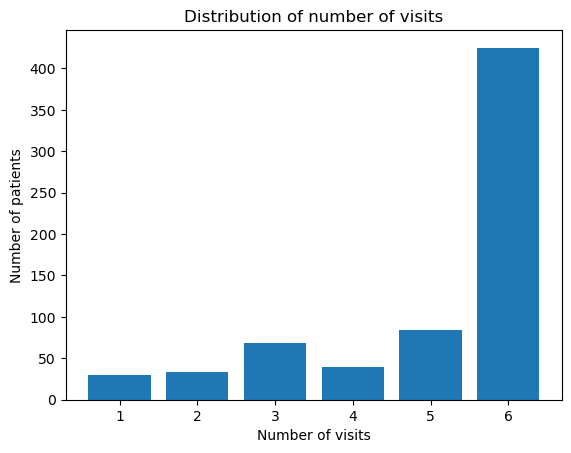

In [27]:
# Group by patient ID and visit date and count the occurrences
visits_count = data.groupby(['PATNO']).size().reset_index("PATNO")
visits_count.rename(columns={0:"visits"})
visits_count

visit_dist = pd.DataFrame(visits_count[0].value_counts()).reset_index(inplace=False)

plt.bar(visit_dist["index"], visit_dist[0])
plt.title("Distribution of number of visits")
plt.xlabel('Number of visits')
plt.ylabel('Number of patients')

plt.show()

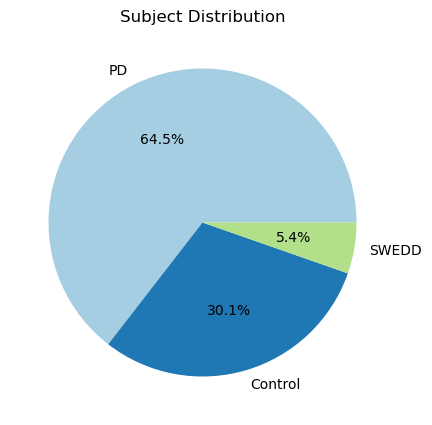

In [28]:
plt.figure(figsize=(5,5))

SUBJECT_GROUP_NAMES = ['PD', 'Control', 'SWEDD']

plt.pie(data['Group'].value_counts(),
       labels=['PD', 'Control', 'SWEDD'], autopct='%1.1f%%',
        colors = sns.color_palette("Paired")
       )

plt.title("Subject Distribution")
plt.show()

<b>For the sake of simplicity I will be including only the patient and the control group for the following analysis. </b>

In [29]:
# Remove the SWEDD group
all_pc = data[data["Group"]!= 3]
# all.info()
# all_pc.isnull().sum().sort_values()

In [30]:
all_pc['year'] = pd.to_datetime(all_pc['visit_date']).dt.year
all_pc['month'] = pd.to_datetime(all_pc['visit_date']).dt.month
all_pc['day'] = pd.to_datetime(all_pc['visit_date']).dt.day
all_pc.drop('visit_date', axis=1, inplace=True)
# all_pc.head()

/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_48703/164514582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pc['year'] = pd.to_datetime(all_pc['visit_date']).dt.year
/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_48703/164514582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pc['month'] = pd.to_datetime(all_pc['visit_date']).dt.month
/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_48703/164514582.py:3: SettingWithCopyWarning: 
A value is trying to be se

#### Create two different data frames for further analysis: With and without genetic variants

In [31]:
# Since every row will be treated as different patient, including different visits from the same patient removing the patient id column PATNO from the analysis
all_features = all_pc.drop("PATNO", axis=1)

# Create a second dataframe without genetic data
gen_cols = ['APOE_e4','APOE_N/A', 'APOE_e2/e2', 'APOE_e2/e4', 'APOE_e3/e2', 'APOE_e3/e3', 'APOE_e4/e3', 'APOE_e4/e4', 'SNCA_rs356181_C/C', 'SNCA_rs356181_C/T', 'SNCA_rs356181_N/A', 'SNCA_rs356181_T/T', 'SNCA_rs3910105_C/C', 'SNCA_rs3910105_C/T', 'SNCA_rs3910105_N/A', 'SNCA_rs3910105_T/T', 'MAPT_H1/H1', 'MAPT_H1/H2', 'MAPT_H2/H2', 'MAPT_N/A']
nogen_features = all_features.drop(gen_cols, axis=1, inplace=False)

In [32]:
# print(all_features.head())
# print(nogen_features.head())

In [33]:
# list(all_features.columns)

#### WITH GENETIC VARIANTS

In [34]:
def preprocess_inputs(data, selected_features):
    data = data.copy()

    y = data["Group"]
    X = data[selected_features]
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    
    return  X_train, X_test, y_train, y_test

In [35]:
models_dict = {}

def train_test_model(model, X_train, y_train, X_test, y_test):
    ## Time taken for training the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    ## Time taken for making predictions and calculating RMSE on the test set
    start_time = time.time()
    y_pred_test = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_time = time.time() - start_time
    
    ## Time taken for cross-validation on the training set
    start_time = time.time()
    y_pred_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    validate_time = time.time() - start_time
    
    
    total_time = train_time + test_time + validate_time
    
    return {"RMSE_test": rmse_test,
            "RMSE_train": rmse_train,
            "train_time": train_time,
            "test_time": test_time,
            "validate_time": validate_time,
            "total_time": total_time
           }

In [36]:
gen_included_features = ['age', 'gen','fampd_new','NHY','rigidity','rigidity_on', 'td_pigd', 'td_pigd_on', 'tremor', 
'tremor_on','NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP1FATG', 'updrs_totscore', 'bjlot', 
'ess', 'gds', 'hvlt_immediaterecall', 'HVLTRDLY', 'HVLTREC', 'HVLTFPRL', 'hvlt_discrimination', 'hvlt_retention', 
'lns', 'rem', 'scopa', 'sft', 'stai', 'SDMTOTAL', 'moca', 'urate', 'MCI_testscores', 'APOE_N/A', 'APOE_e2/e2',
 'APOE_e2/e4', 'APOE_e3/e2', 'APOE_e3/e3', 'APOE_e4/e3', 'APOE_e4/e4', 'SNCA_rs356181_C/C', 'SNCA_rs356181_C/T',
 'SNCA_rs356181_N/A', 'SNCA_rs356181_T/T', 'SNCA_rs3910105_C/C', 'SNCA_rs3910105_C/T', 'SNCA_rs3910105_N/A',
 'SNCA_rs3910105_T/T', 'MAPT_H1/H1', 'MAPT_H1/H2', 'MAPT_H2/H2', 'MAPT_N/A',]
X_train, X_test, y_train, y_test = preprocess_inputs(all_features, gen_included_features)

In [37]:
# X_train

In [38]:
# y_train

In [39]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  K-Nearest Neighbours": KNeighborsClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)    
}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(name + ":")
    print("  Mean accuracy: {:.2f}%".format(scores.mean() * 100))
    print("  Standard deviation: {:.2f}%".format(scores.std() * 100))    
for name, model in models.items():
    print(f"{model} + {name}")
    model_results = train_test_model(model, X_train, y_train, X_test, y_test)
    models_dict[f"{name}"] = model_results
    
models_dict

                   Logistic Regression:
  Mean accuracy: 99.46%
  Standard deviation: 0.49%
                  K-Nearest Neighbours:
  Mean accuracy: 95.54%
  Standard deviation: 1.44%


/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/s

Support Vector Machine (Linear Kernel):
  Mean accuracy: 99.38%
  Standard deviation: 0.58%
   Support Vector Machine (RBF Kernel):
  Mean accuracy: 99.46%
  Standard deviation: 0.39%
                        Neural Network:
  Mean accuracy: 99.19%
  Standard deviation: 0.44%
                         Random Forest:
  Mean accuracy: 99.54%
  Standard deviation: 0.29%
                     Gradient Boosting:
  Mean accuracy: 99.58%
  Standard deviation: 0.44%
                              CatBoost:
  Mean accuracy: 99.58%
  Standard deviation: 0.47%
LogisticRegression() +                    Logistic Regression
KNeighborsClassifier() +                   K-Nearest Neighbours
LinearSVC() + Support Vector Machine (Linear Kernel)
SVC() +    Support Vector Machine (RBF Kernel)


/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


MLPClassifier() +                         Neural Network
RandomForestClassifier() +                          Random Forest
GradientBoostingClassifier() +                      Gradient Boosting
<catboost.core.CatBoostClassifier object at 0x14d9b0fd0> +                               CatBoost


{'                   Logistic Regression': {'RMSE_test': 0.09600307214746387,
  'RMSE_train': 0.05188745216627708,
  'train_time': 0.008828163146972656,
  'test_time': 0.000598907470703125,
  'validate_time': 0.002241849899291992,
  'total_time': 0.011668920516967773},
 '                  K-Nearest Neighbours': {'RMSE_test': 0.19596545041740512,
  'RMSE_train': 0.1427747014866968,
  'train_time': 0.002348661422729492,
  'test_time': 0.041071176528930664,
  'validate_time': 0.17187190055847168,
  'total_time': 0.21529173851013184},
 'Support Vector Machine (Linear Kernel)': {'RMSE_test': 0.10369516947304253,
  'RMSE_train': 0.05188745216627708,
  'train_time': 0.02439284324645996,
  'test_time': 0.0006899833679199219,
  'validate_time': 0.0005960464477539062,
  'total_time': 0.02567887306213379},
 '   Support Vector Machine (RBF Kernel)': {'RMSE_test': 0.11085479909473865,
  'RMSE_train': 0.048038446141526144,
  'train_time': 0.05647897720336914,
  'test_time': 0.02707815170288086,
  'v

In [40]:
#  Create ists for the values to create the plots
model_names = []
RMSE_test = []
RMSE_train = []
train_time = []
test_time = []
validate_time = []
total_time = []

for model, results in models_dict.items():
    if "RMSE_train" in results and "RMSE_test" in results and "train_time" in results and "test_time" in results and "total_time" in results and "validate_time" in results:
        model_names.append(model)
        RMSE_test.append(results["RMSE_test"])
        RMSE_train.append(results["RMSE_train"])
        train_time.append(results["train_time"])
        test_time.append(results["test_time"])
        validate_time.append(results["validate_time"])
        total_time.append(results["total_time"])
    else:
        print(f"Skipping model {model} due to missing values")

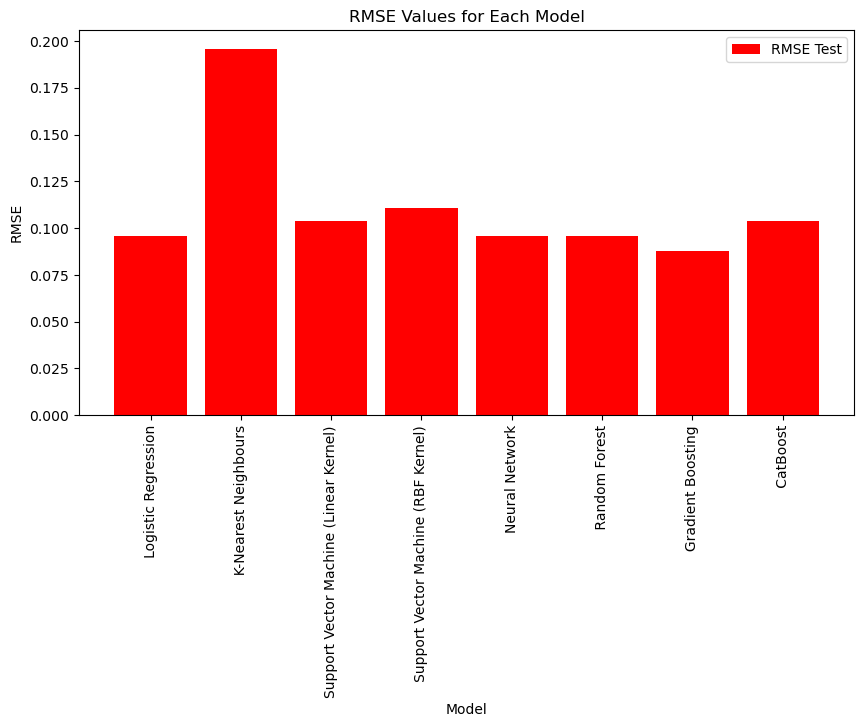

In [41]:
# Bar charts for the RMSE values for the test set
plt.figure(figsize=(10, 5))
plt.bar(model_names, RMSE_test, label="RMSE Test", color="red")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Values for Each Model")
plt.xticks(rotation=90)
plt.legend()
plt.show()


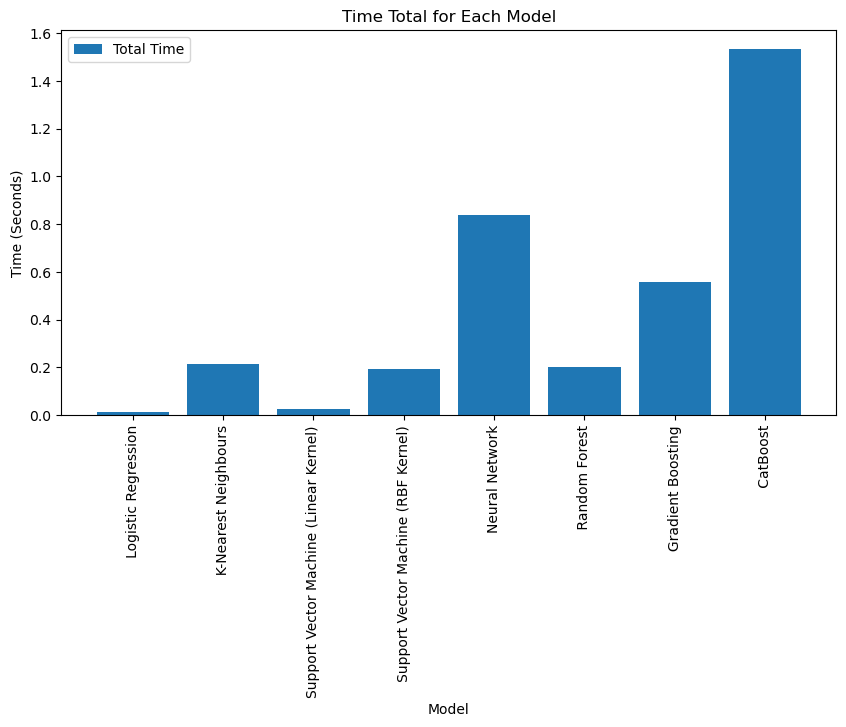

In [42]:
# Bar charts for the total time taken for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, total_time, label="Total Time")
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Time Total for Each Model")
plt.xticks(rotation=90)
plt.legend()
plt.show()

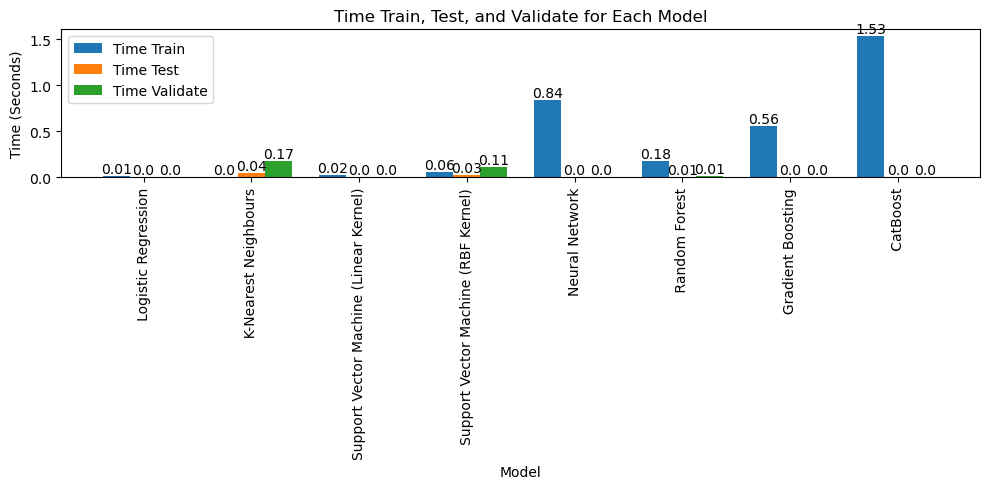

In [43]:
#  Bar charts for the time taken for each model for different processes
x_train = np.arange(len(model_names))
x_test = x_train + 0.25
x_validate = x_train + 0.5

plt.figure(figsize=(10, 5))
plt.bar(x_train, train_time, width=0.25, label="Time Train")
plt.bar(x_test, test_time, width=0.25, label="Time Test")
plt.bar(x_validate, validate_time, width=0.25, label="Time Validate")

plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Time Train, Test, and Validate for Each Model")
plt.legend(loc="upper left")

for i, bar in enumerate(plt.gca().containers):
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom')

plt.xticks(x_test, model_names)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


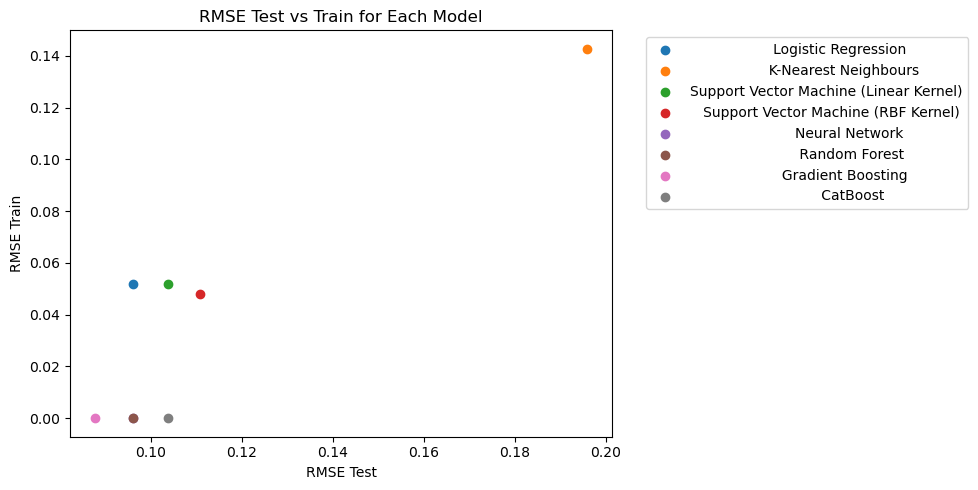

In [44]:
# Bar charts for the difference between RMSE_test and RMSE_train
plt.figure(figsize=(10, 5))
for i, model in enumerate(model_names):
    plt.scatter(RMSE_test[i], RMSE_train[i], label=model)
    diff = abs(RMSE_train[i] - RMSE_test[i])
    text_pos = (RMSE_test[i] + 0.02, RMSE_train[i] + 0.02)

plt.xlabel("RMSE Test")
plt.ylabel("RMSE Train")
plt.title("RMSE Test vs Train for Each Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_48703/3157878542.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(model_names))


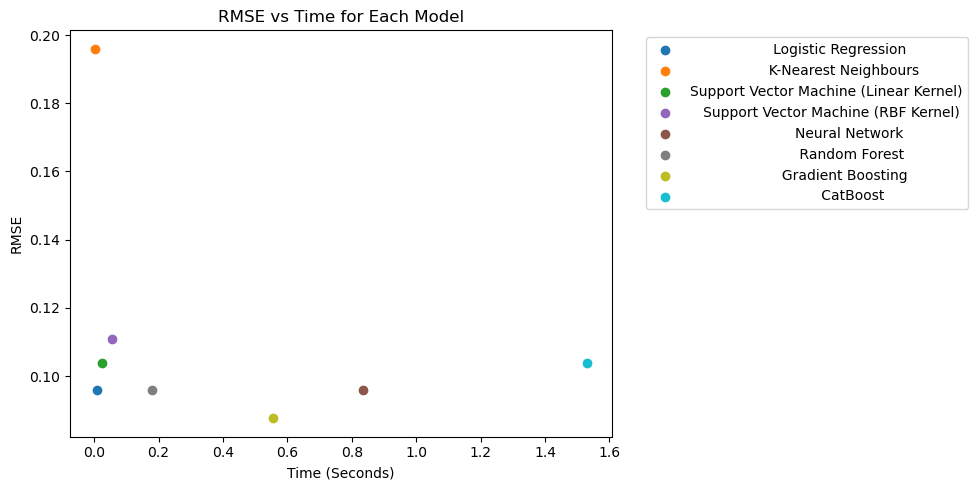

In [45]:
# Error rates vs time taken for each model
plt.figure(figsize=(10, 5))
color_map = plt.cm.get_cmap('tab10', len(model_names))

for i, model in enumerate(model_names):
    plt.scatter(train_time[i], RMSE_test[i], label=model, color=color_map(i))

plt.xlabel("Time (Seconds)")
plt.ylabel("RMSE")
plt.title("RMSE vs Time for Each Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### WITHOUT GENETICS VARIANTS

### Encode the categorical columns (genetic variants in this context)

In [46]:
nogen_cols = ['age', 'gen','fampd_new','NHY','rigidity','rigidity_on', 'td_pigd', 'td_pigd_on', 'tremor', 
'tremor_on','NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP1FATG', 'updrs_totscore', 'bjlot', 
'ess', 'gds', 'hvlt_immediaterecall', 'HVLTRDLY', 'HVLTREC', 'HVLTFPRL', 'hvlt_discrimination', 'hvlt_retention', 
'lns', 'rem', 'scopa', 'sft', 'stai', 'SDMTOTAL', 'moca', 'urate', 'MCI_testscores']
X_train, X_test, y_train, y_test = preprocess_inputs(nogen_features, nogen_cols)

### Train the models

In [47]:
models_dict2 = {}

for name, model in models.items():
    print(f"{model} + {name}")
    model_results = train_test_model(model, X_train, y_train, X_test, y_test)
    models_dict2[f"{name}"] = model_results
    
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(name + ":")
    print("  Mean accuracy: {:.2f}%".format(scores.mean() * 100))
    print("  Standard deviation: {:.2f}%".format(scores.std() * 100))    
for name, model in models.items():
    print(f"{model} + {name}")
    model_results = train_test_model(model, X_train, y_train, X_test, y_test)
    models_dict[f"{name}"] = model_results
    
models_dict2 

LogisticRegression() +                    Logistic Regression
KNeighborsClassifier() +                   K-Nearest Neighbours
LinearSVC() + Support Vector Machine (Linear Kernel)


/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC() +    Support Vector Machine (RBF Kernel)
MLPClassifier() +                         Neural Network
RandomForestClassifier() +                          Random Forest
GradientBoostingClassifier() +                      Gradient Boosting
<catboost.core.CatBoostClassifier object at 0x14d9b0fd0> +                               CatBoost
                   Logistic Regression:
  Mean accuracy: 99.31%
  Standard deviation: 0.41%
                  K-Nearest Neighbours:
  Mean accuracy: 97.23%
  Standard deviation: 1.31%
Support Vector Machine (Linear Kernel):
  Mean accuracy: 99.23%
  Standard deviation: 0.34%


/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/s

   Support Vector Machine (RBF Kernel):
  Mean accuracy: 99.15%
  Standard deviation: 0.48%
                        Neural Network:
  Mean accuracy: 99.15%
  Standard deviation: 0.45%
                         Random Forest:
  Mean accuracy: 99.42%
  Standard deviation: 0.35%
                     Gradient Boosting:
  Mean accuracy: 99.31%
  Standard deviation: 0.34%
                              CatBoost:
  Mean accuracy: 99.46%
  Standard deviation: 0.46%
LogisticRegression() +                    Logistic Regression
KNeighborsClassifier() +                   K-Nearest Neighbours
LinearSVC() + Support Vector Machine (Linear Kernel)


/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC() +    Support Vector Machine (RBF Kernel)
MLPClassifier() +                         Neural Network
RandomForestClassifier() +                          Random Forest
GradientBoostingClassifier() +                      Gradient Boosting
<catboost.core.CatBoostClassifier object at 0x14d9b0fd0> +                               CatBoost


{'                   Logistic Regression': {'RMSE_test': 0.055427399547369326,
  'RMSE_train': 0.06504436355879908,
  'train_time': 0.015976905822753906,
  'test_time': 0.0008380413055419922,
  'validate_time': 0.0005280971527099609,
  'total_time': 0.01734304428100586},
 '                  K-Nearest Neighbours': {'RMSE_test': 0.1567723603339241,
  'RMSE_train': 0.1255755978254962,
  'train_time': 0.0007679462432861328,
  'test_time': 0.04553389549255371,
  'validate_time': 0.13062691688537598,
  'total_time': 0.17692875862121582},
 'Support Vector Machine (Linear Kernel)': {'RMSE_test': 0.055427399547369326,
  'RMSE_train': 0.06793662204867575,
  'train_time': 0.01823282241821289,
  'test_time': 0.0052988529205322266,
  'validate_time': 0.004006147384643555,
  'total_time': 0.027537822723388672},
 '   Support Vector Machine (RBF Kernel)': {'RMSE_test': 0.055427399547369326,
  'RMSE_train': 0.05883484054145521,
  'train_time': 0.03848409652709961,
  'test_time': 0.0187680721282959,
  '

In [48]:
#  Create ists for the values to create the plots
model_names = []
RMSE_test = []
RMSE_train = []
train_time = []
test_time = []
validate_time = []
total_time = []

for model, results in models_dict2.items():
    if "RMSE_train" in results and "RMSE_test" in results and "train_time" in results and "test_time" in results and "total_time" in results and "validate_time" in results:
        model_names.append(model)
        RMSE_test.append(results["RMSE_test"])
        RMSE_train.append(results["RMSE_train"])
        train_time.append(results["train_time"])
        test_time.append(results["test_time"])
        validate_time.append(results["validate_time"])
        total_time.append(results["total_time"])
    else:
        print(f"Skipping model {model} due to missing values")

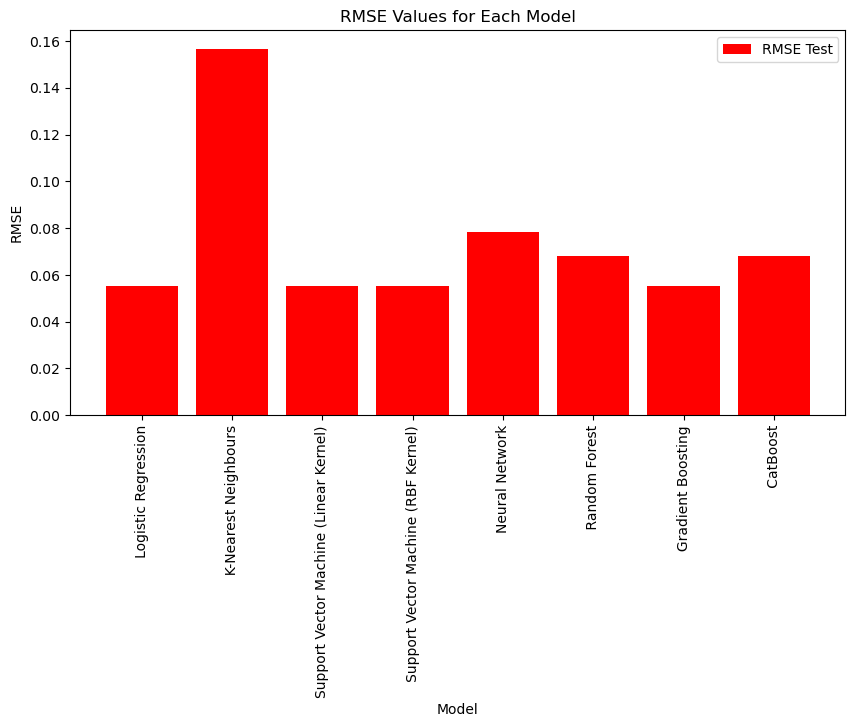

In [49]:
# Bar charts for the RMSE values for the test set
plt.figure(figsize=(10, 5))
plt.bar(model_names, RMSE_test, label="RMSE Test", color="red")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Values for Each Model")
plt.xticks(rotation=90)
plt.legend()
plt.show()

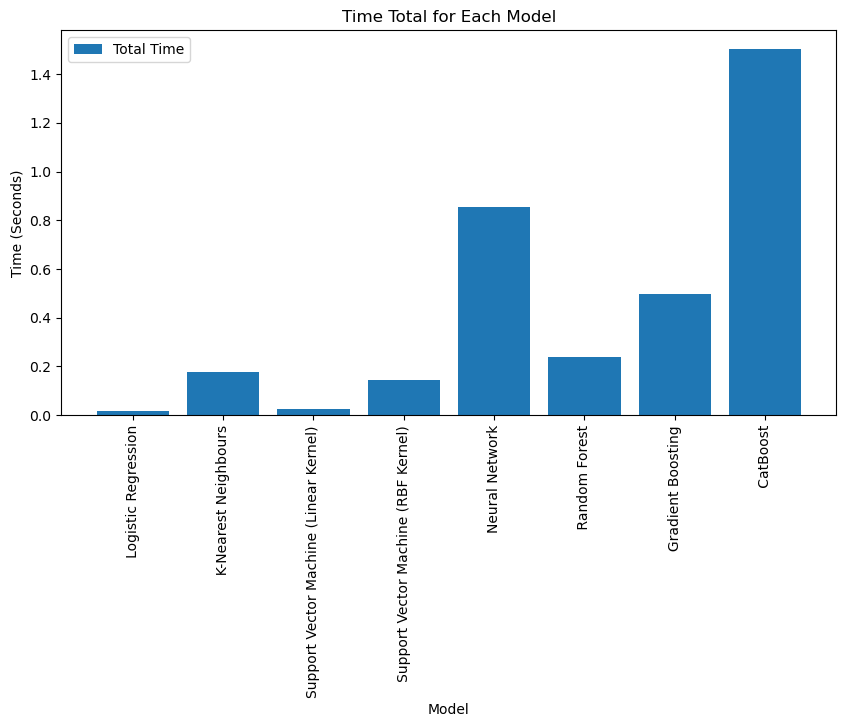

In [50]:
# Bar charts for the total time taken for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, total_time, label="Total Time")
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Time Total for Each Model")
plt.xticks(rotation=90)
plt.legend()
plt.show()

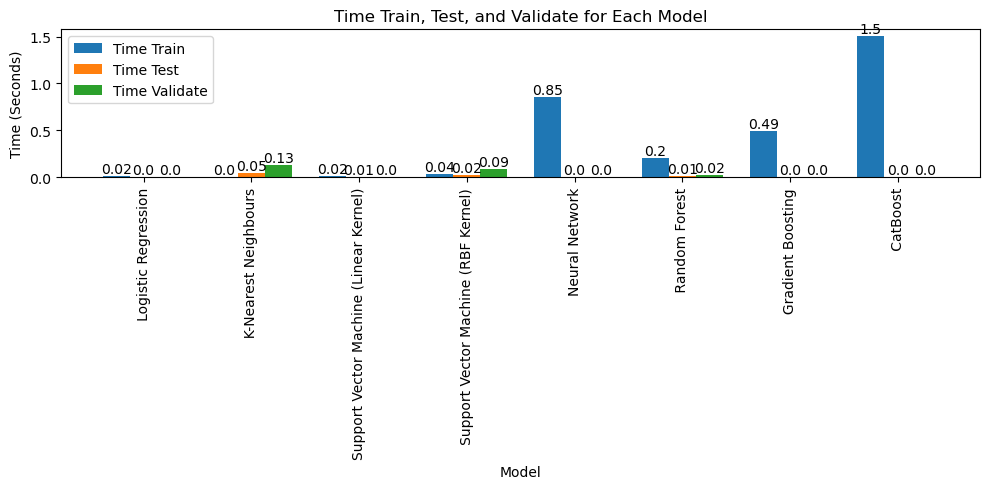

In [51]:
#  Bar charts for the time taken for each model for different processes
x_train = np.arange(len(model_names))
x_test = x_train + 0.25
x_validate = x_train + 0.5

plt.figure(figsize=(10, 5))
plt.bar(x_train, train_time, width=0.25, label="Time Train")
plt.bar(x_test, test_time, width=0.25, label="Time Test")
plt.bar(x_validate, validate_time, width=0.25, label="Time Validate")

plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Time Train, Test, and Validate for Each Model")
plt.legend(loc="upper left")

for i, bar in enumerate(plt.gca().containers):
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height, 2)), ha='center', va='bottom')

plt.xticks(x_test, model_names)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


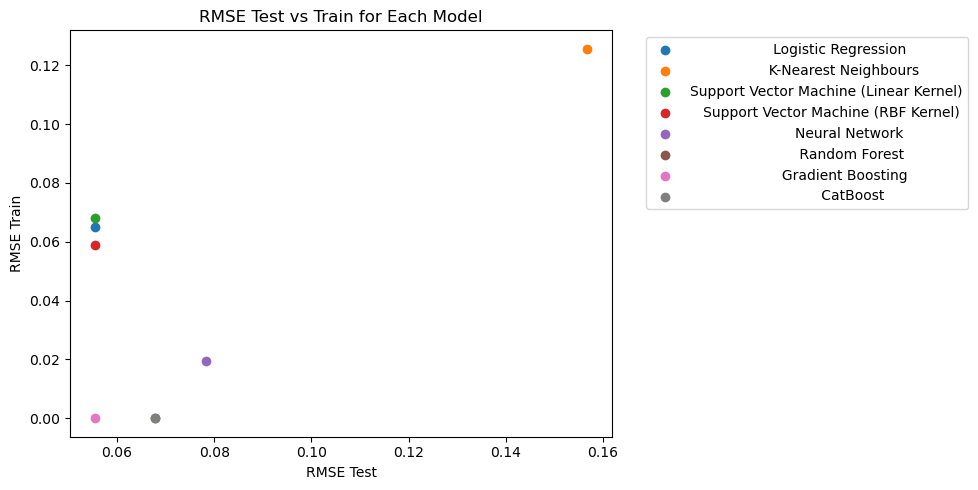

In [52]:
# Bar charts for the difference between RMSE_test and RMSE_train
plt.figure(figsize=(10, 5))
for i, model in enumerate(model_names):
    plt.scatter(RMSE_test[i], RMSE_train[i], label=model)
    diff = abs(RMSE_train[i] - RMSE_test[i])
    text_pos = (RMSE_test[i] + 0.02, RMSE_train[i] + 0.02)
#     plt.text(*text_pos, str(round(diff, 2)), ha='center', va='bottom')

plt.xlabel("RMSE Test")
plt.ylabel("RMSE Train")
plt.title("RMSE Test vs Train for Each Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_48703/3157878542.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(model_names))


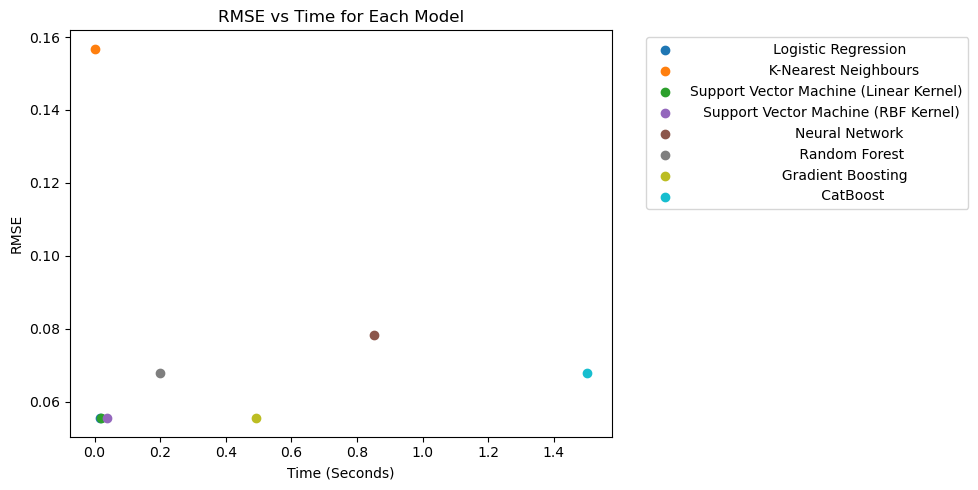

In [53]:
# Error rates vs time taken for each model
plt.figure(figsize=(10, 5))
color_map = plt.cm.get_cmap('tab10', len(model_names))

for i, model in enumerate(model_names):
    plt.scatter(train_time[i], RMSE_test[i], label=model, color=color_map(i))

plt.xlabel("Time (Seconds)")
plt.ylabel("RMSE")
plt.title("RMSE vs Time for Each Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## LOGISTIC REGRESSION: Considering overall consistent performance with and without genetic data. Efficient in time and high accuracy

In [54]:
model_gen = LogisticRegression()
model_nogen = LogisticRegression()

In [55]:
## TRAIN WITH GENETIC DATA
y_gen = all_features["Group"]
X_gen = all_features[gen_included_features]

#Scale X
scaler = StandardScaler()
scaler.fit(X_gen)
X_train = pd.DataFrame(scaler.transform(X_gen), index=X_gen.index, columns=X_gen.columns)
model_gen.fit(X_gen, y_gen)

/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
## TRAIN A MODEL WITHOUT GENETIC DATA
y_nogen = all_features["Group"]
X_nogen = all_features[nogen_cols]

#Scale X
scaler = StandardScaler()
scaler.fit(X_nogen)
X_train = pd.DataFrame(scaler.transform(X_nogen), index=X_nogen.index, columns=X_nogen.columns)
model_nogen.fit(X_nogen, y_nogen)

/Users/hazalsenturk/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
nogen_cols.append("Group")
nogeneticinfo = all_features[nogen_cols]
nogeneticinfo = nogeneticinfo.loc[:, ~nogeneticinfo.columns.duplicated()]
# nogeneticinfo

## CANDIDATE FOR DEMO

In [67]:
d1= all_features[(all_features["Group"]==1) & (all_features['gen']==2)& (all_features['age']<34) ]
d2= all_features[(all_features["Group"]==2) & (all_features['gen']==1)& (all_features['age']>80) ]
d3= nogeneticinfo[(nogeneticinfo["Group"]==1) & (nogeneticinfo['gen']==1)& (nogeneticinfo['age']<35) ]
d4= nogeneticinfo[(nogeneticinfo["Group"]==2) & (nogeneticinfo['gen']==2)& (nogeneticinfo['age']<35) ]


In [68]:
# d1 # pick the index 779 
d2
# d3
# d4

,Group,EVENT_ID,YEAR,ST_year1,ST_year2,ST_year3,ST_year4,ST_year5,primdiag,age,age_cat,gen,HISPLAT,race,fampd_new,symptom6,NHY,NHY_ON,rigidity,rigidity_on,td_pigd,td_pigd_on,tremor,tremor_on,updrs3_score,updrs3_score_on,PD_MED_USE,updrs1_score,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1FATG,updrs2_score,updrs_totscore,updrs_totscore_on,bjlot,ess,ess_cat,gds,gds_cat,hvlt_immediaterecall,HVLTRDLY,HVLTREC,HVLTFPRL,hvlt_discrimination,hvlt_retention,lns,quip_gamble,quip_sex,quip_buy,quip_eat,quip_hobby,quip_pund,quip_walk,quip,quip_any,rem,rem_cat,rem_q6,scopa_gi,scopa_ur,scopa_cv,scopa_therm,scopa_pm,scopa_sex,scopa,VLTANIM,VLTVEG,VLTFRUIT,sft,stai_state,stai_trait,stai,SDMTOTAL,moca,urate,APOE_e4,MCI_testscores,ST_FLAG,APOE_N/A,APOE_e2/e2,APOE_e2/e4,APOE_e3/e2,APOE_e3/e3,APOE_e4/e3,APOE_e4/e4,SNCA_rs356181_C/C,SNCA_rs356181_C/T,SNCA_rs356181_N/A,SNCA_rs356181_T/T,SNCA_rs3910105_C/C,SNCA_rs3910105_C/T,SNCA_rs3910105_N/A,SNCA_rs3910105_T/T,MAPT_H1/H1,MAPT_H1/H2,MAPT_H2/H2,MAPT_N/A,year,month,day
892,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,81.263014,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,0.0,13.0,13.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,17.0,17.0,11.0,0.0,0.0,1.0,0.0,17.0,4.0,11.0,2.0,9.0,0.666667,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,17.0,7.0,7.0,31.0,42.0,26.0,68.0,42.0,27.0,363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011,11,1
893,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,81.263014,3.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,20.0,20.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,25.0,25.0,15.0,0.0,0.0,1.0,0.0,24.0,7.0,12.0,3.0,8.0,0.700000,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,4.0,17.0,11.0,13.0,41.0,20.0,24.0,44.0,46.0,22.0,393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2012,11,1
894,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,97.0,81.263014,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,17.0,17.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,21.0,21.0,14.0,5.0,0.0,2.0,0.0,16.0,3.0,10.0,3.0,4.0,0.500000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,7.0,18.0,7.0,7.0,32.0,32.0,32.0,64.0,47.0,19.0,297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2015,2,1
895,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,97.0,81.263014,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,33.0,33.0,12.0,1.0,0.0,1.0,0.0,16.0,4.0,11.0,0.0,11.0,0.666667,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,17.0,13.0,5.0,35.0,26.0,22.0,48.0,41.0,23.0,387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2017,2,1
2930,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,82.712329,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,23.0,10.0,11.0,2.0,9.0,1.000000,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,19.0,8.0,13.0,40.0,23.0,20.0,43.0,33.0,30.0,387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013,2,1
2931,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,82.712329,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,10.0,7.0,0.0,0.0,0.0,26.0,9.0,11.0,0.0,11.0,0.818182,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,5.0,17.0,5.0,17.0,39.0,23.0,20.0,43.0,38.0,27.0,339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014,1,1
2932,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,82.712329,3.0,1.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,15.0,8.0,0.0,0.0,0.0,26.0,10.0,12.0,0.0,12.0,1.000000,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,8.0,19.0,8.0,12

In [77]:
# with disease- with genetic

eudokia = d1.iloc[0] # 33 years old, female, no family with pd, slight sleeping disorders,updrs= 19
# what we missed by looking at this data: MAPT H1/H1 genotype. y CP Zabetian · 2007 · Cited by 183 — Several small case-control studies have observed a marginally significant excess of the H1/H1 diplotype among patients with Parkinson's disease

# without disease - with genetic
ruben = d2.iloc[4] #  81 years old, male, no family with pd, updrs =17

# with disease without genetic
olwen = d3.iloc[0]  # 34 years old, male, no family with pd, updrs=36

# without disease without genetic
santuzza = d4.iloc[0] # 30 years old, female, no_famil, updrs=0


In [78]:
import joblib
import ipywidgets as widgets
from IPython.display import display

# NO GENETIC DEMO

## PREDICT FOR Olwen and Santuzza that has no genetic data registered. They have medical examination data and demographics available

In [79]:
nogen_input_widgets = {
'age': widgets.FloatText(description='Age'),
'gen': widgets.FloatText(description='Gender'),
'fampd_new': widgets.FloatText(description='Family history'),
'NHY': widgets.FloatText(description='Hoehn&Yahr Stage'),
'rigidity': widgets.FloatText(description='Rigidity'),
'rigidity_on': widgets.FloatText(description='Rigidity_on'),
'td_pigd': widgets.FloatText(description='TD_PIGD'),
'td_pigd_on': widgets.FloatText(description='TD_PIGD_on'),
'tremor': widgets.FloatText(description='Tremor'),
'tremor_on': widgets.FloatText(description='Tremor_on'),
'NP1COG': widgets.FloatText(description='Cognitive'),
'NP1HALL': widgets.FloatText(description='Hallucinations'),
'NP1DPRS': widgets.FloatText(description='Depression'),
'NP1ANXS': widgets.FloatText(description='Anxiety'),
'NP1APAT': widgets.FloatText(description='Apathy'),
'NP1DDS': widgets.FloatText(description='Dopamine Dys.'),
'NP1FATG': widgets.FloatText(description='Fatique'),
'updrs_totscore': widgets.FloatText(description='UPDRS Total'),
'bjlot': widgets.FloatText(description='Line Orientation'),
'ess': widgets.FloatText(description='Epworth Sleepiness'),
'gds': widgets.FloatText(description='Geriatric Depr. Sc.'),
'hvlt_immediaterecall': widgets.FloatText(description='Imm Recall'),
'HVLTRDLY': widgets.FloatText(description='Delayed Recall'),
'HVLTREC': widgets.FloatText(description='Delayed Recognition'),
'HVLTFPRL': widgets.FloatText(description='False Alarms'),
'hvlt_discrimination': widgets.FloatText(description='Discrimintaion Recog.'),
'hvlt_retention': widgets.FloatText(description='Retention'),
'lns': widgets.FloatText(description='Letter Number Seq.'),
'rem': widgets.FloatText(description='REM'),
'scopa': widgets.FloatText(description='SCOPA-AUT'),
'sft': widgets.FloatText(description='Semantic Fluency'),
'stai': widgets.FloatText(description='STAI'),
'SDMTOTAL': widgets.FloatText(description='Symbol Digit Modalities'),
'moca': widgets.FloatText(description='MOCA'),
'urate': widgets.FloatText(description='Urate'),
'MCI_testscores': widgets.FloatText(description='MCI')
}



In [80]:
for key in nogen_input_widgets.keys():
    nogen_input_widgets[key].value = olwen[key]
    
# for key in nogen_input_widgets.keys():
#     nogen_input_widgets[key].value = santuzza[key]
    
predict_button = widgets.Button(description='Predict')

def predict_button_clicked(b):
    
    input_values = [nogen_input_widgets[key].value for key in nogen_input_widgets]
    
    input_df = pd.DataFrame([input_values], columns=nogen_input_widgets.keys())
    
    predictions = model_nogen.predict(input_df)
   
    print("Predictions:")
    if predictions ==1:
        print("HIGH PROBABILITY OF PARKINSON'S DISEASE")
    else:
        print("HEALTHY INDIVIDUAL")
        

predict_button.on_click(predict_button_clicked)
display(widgets.VBox(list(nogen_input_widgets.values()) + [predict_button]))

# GENETIC DEMO

## PREDICT FOR Eudokia and Ruben that has genetic data, medical examination and demographics data available.

In [81]:
gen_input_widgets = {
'age': widgets.FloatText(description='Age'),
'gen': widgets.FloatText(description='Gender'),
'fampd_new': widgets.FloatText(description='Family history'),
'NHY': widgets.FloatText(description='Hoehn&Yahr Stage'),
'rigidity': widgets.FloatText(description='Rigidity'),
'rigidity_on': widgets.FloatText(description='Rigidity_on'),
'td_pigd': widgets.FloatText(description='TD_PIGD'),
'td_pigd_on': widgets.FloatText(description='TD_PIGD_on'),
'tremor': widgets.FloatText(description='Tremor'),
'tremor_on': widgets.FloatText(description='Tremor_on'),
'NP1COG': widgets.FloatText(description='Cognitive'),
'NP1HALL': widgets.FloatText(description='Hallucinations'),
'NP1DPRS': widgets.FloatText(description='Depression'),
'NP1ANXS': widgets.FloatText(description='Anxiety'),
'NP1APAT': widgets.FloatText(description='Apathy'),
'NP1DDS': widgets.FloatText(description='Dopamine Dys.'),
'NP1FATG': widgets.FloatText(description='Fatique'),
'updrs_totscore': widgets.FloatText(description='UPDRS Total'),
'bjlot': widgets.FloatText(description='Line Orientation'),
'ess': widgets.FloatText(description='Epworth Sleepiness'),
'gds': widgets.FloatText(description='Geriatric Depr. Sc.'),
'hvlt_immediaterecall': widgets.FloatText(description='Imm Recall'),
'HVLTRDLY': widgets.FloatText(description='Delayed Recall'),
'HVLTREC': widgets.FloatText(description='Delayed Recognition'),
'HVLTFPRL': widgets.FloatText(description='False Alarms'),
'hvlt_discrimination': widgets.FloatText(description='Discrimintaion Recog.'),
'hvlt_retention': widgets.FloatText(description='Retention'),
'lns': widgets.FloatText(description='Letter Number Seq.'),
'rem': widgets.FloatText(description='REM'),
'scopa': widgets.FloatText(description='SCOPA-AUT'),
'sft': widgets.FloatText(description='Semantic Fluency'),
'stai': widgets.FloatText(description='STAI'),
'SDMTOTAL': widgets.FloatText(description='Symbol Digit Modalities'),
'moca': widgets.FloatText(description='MOCA'),
'urate': widgets.FloatText(description='Urate'),
'MCI_testscores': widgets.FloatText(description='MCI'),
'APOE_N/A': widgets.FloatText(description='APOE_N/A'),
'APOE_e2/e2': widgets.FloatText(description='APOE_e2/e2'),
'APOE_e2/e4': widgets.FloatText(description='APOE_e2/e4'),
'APOE_e3/e2': widgets.FloatText(description='APOE_e3/e2'),
'APOE_e3/e3': widgets.FloatText(description='APOE_e3/e3'),
'APOE_e4/e3': widgets.FloatText(description='APOE_e4/e3'),
'APOE_e4/e4': widgets.FloatText(description='APOE_e4/e4'),
'SNCA_rs356181_C/C': widgets.FloatText(description='SNCA_C/C'),
'SNCA_rs356181_C/T': widgets.FloatText(description='SNCA_C/T'),
'SNCA_rs356181_N/A': widgets.FloatText(description='SNCA_N/A'),
'SNCA_rs356181_T/T': widgets.FloatText(description='SNCA_T/T'),
'SNCA_rs3910105_C/C': widgets.FloatText(description='SNCA_C/C'),
'SNCA_rs3910105_C/T': widgets.FloatText(description='SNCA_C/T'),
'SNCA_rs3910105_N/A': widgets.FloatText(description='SNCA_N/A'),
'SNCA_rs3910105_T/T': widgets.FloatText(description='SNCA_T/T'),
'MAPT_H1/H1': widgets.FloatText(description='MAPT_H1/H1'),
'MAPT_H1/H2': widgets.FloatText(description='MAPT_H1/H2'),
'MAPT_H2/H2': widgets.FloatText(description='MAPT_H2/H2'),
'MAPT_N/A': widgets.FloatText(description='MAPT_N/A')
}

In [84]:
for key in gen_input_widgets.keys():
    gen_input_widgets[key].value = eudokia[key]
    
# for key in gen_input_widgets.keys():
#     gen_input_widgets[key].value = ruben[key]
    
predict_button = widgets.Button(description='Predict')

def predict_button_clicked(b):
    
    input_values = [gen_input_widgets[key].value for key in gen_input_widgets]
    
    input_df = pd.DataFrame([input_values], columns=gen_input_widgets.keys())
    
    predictions = model_gen.predict(input_df)
   
    print("Predictions:")
    if predictions ==1:
        print("HIGH PROBABILITY OF PARKINSON'S DISEASE")
    else:
        print("HEALTHY INDIVIDUAL")
        

predict_button.on_click(predict_button_clicked)
display(widgets.VBox(list(gen_input_widgets.values()) + [predict_button]))

Predictions:
HIGH PROBABILITY OF PARKINSON'S DISEASE
